**About Dataset**

MNIST Dataset

1.   Each image is of 28 * 28 pixel
2.   There are 60k datapoints 






**About ANN architecture**

About Each layer
1.   784 (= 28 * 28) input nodes 
2.   10 output nodes
3.   128 nodes in Hidden Layer


---


Number of trainable parameters:
1.   tp1 = From Input layer to Hidden layer = 784*128+128
2.   tp2 = From Hidden layer to Output layer = 128*10 +10
3.   total number of trainable parameters = tp1 +tp2



In [56]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [57]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [58]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [59]:
# 60000 images with each image of size 28 * 28

X_train.shape

(60000, 28, 28)

In [60]:
# size of first image = 28*28
X_train[0].shape

(28, 28)

In [61]:
# pixel values (28*28) of first image

X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [62]:
# Labels/Output values (from 0 to 9)

y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

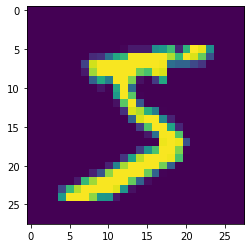

In [63]:
# Converting pixels values of first image from Training set and displaying it below

import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [64]:
# Scaling all the pixel values between 0 and 1 (both inclusive)

X_train = X_train/255
X_test = X_test/255

In [65]:
model = Sequential()

# Pixel values is in shape of 28 * 28. We need to flatten this matrix and bring it to the shape 1 * 784 pixel  (28 * 28 = 784)
model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128,activation='relu'))     # Hidden layer with 128 nodes and relu activation. Output of flatten will go in this layer. Hence here we need not give input dimension
model.add(Dense(10,activation='softmax'))   # Output layer with 10 output nodes and Softmax activation

In [66]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [70]:
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2836 - accuracy: 0.9191 - val_loss: 0.1519 - val_accuracy: 0.9554
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1239 - accuracy: 0.9631 - val_loss: 0.1178 - val_accuracy: 0.9647
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0860 - accuracy: 0.9741 - val_loss: 0.0991 - val_accuracy: 0.9701
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0640 - accuracy: 0.9803 - val_loss: 0.0963 - val_accuracy: 0.9717
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0489 - accuracy: 0.9850 - val_loss: 0.0885 - val_accuracy: 0.9719
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0390 - accuracy: 0.9880 - val_loss: 0.0851 - val_accuracy: 0.9750
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0302 - accuracy: 0.9909 - val_loss: 0.0856 - val_accuracy:

In [71]:
# gives 10 output for each datapoint. Each of the 10 outputs will specify the probability of the image being 0,1,2,3....9. Whichever probabolity is higher will be the digit that datapoint represents

y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [72]:
# for each output (i.e 10 output for each datapoint) we will find out at which array index the value is maximum. 
# Eg. if for first datapoint output is maximum at 5th position (which is the output given by 4th node) then that digit is 5.

y_pred = y_prob.argmax(axis = 1)
y_pred

# here first output 7 means our model predicted the first datapoint to be digit 7, second datapoint 2 means model predicted second datapoint to be 2 and so on


array([7, 2, 1, ..., 4, 5, 6])

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9724

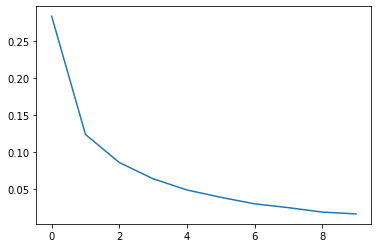

In [74]:
plt.plot(history.history['loss'])

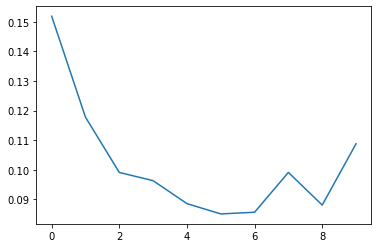

In [75]:
plt.plot(history.history['val_loss'])

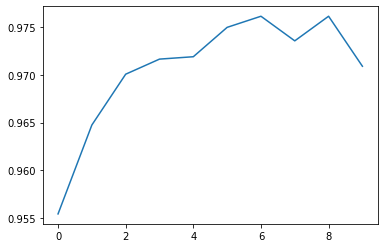

In [76]:
plt.plot(history.history['val_accuracy'])

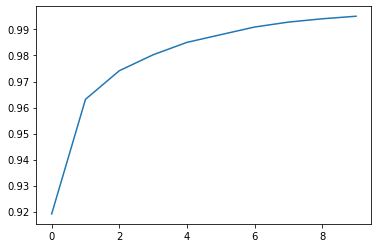

In [78]:
plt.plot(history.history['accuracy'])